## Load anamnesis from files

In [105]:
import numpy as np
import pandas as pd
import os
import re

In [106]:
PATH_TO_ANAMNESIS_DIR = "../../data/anamnesis/source/almazov_anamnesis_corpus/distinct"

In [107]:
filenames = os.listdir(PATH_TO_ANAMNESIS_DIR)

In [108]:
all_anamnesis_filepath = [ PATH_TO_ANAMNESIS_DIR+os.sep+name for name in filenames]
all_anamnesis_filepath

['../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/11010_С2012.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/9431_С2010 9979_С2010.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/8760_С2011.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/25623_С2015.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/5722_С2014.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/1588_С2012.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/4159_С2014.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/26958_С2015.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/9599_С2011 10194_С2011.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/21928_С2015.xml.txt',
 '../../data/anamnesis/source/almazov_anamnesis_corpus/distinct/766_С2012.xml.txt',
 '../../data/anamnesis/source/almazov_a

In [109]:
all_anamnesis_texts = list()
for path in all_anamnesis_filepath:
    with open(path, encoding="cp1251") as file:
        all_anamnesis_texts.append(file.read())

In [110]:
all_anamnesis_texts

['   Хронические заболевания в анамнезе  : ГБ; ИБС; стенокардия напряжения; хронический гастродуоденит, ремиссия.   Наследственность:  не отягощена   Страховой анамнез:  не работает   Аллергологический анамнез  : без особенностей   Вредные привычки:  отрицает  \n',
 '   Хронические заболевания в анамнезе  : ГБ; ИБС; стенокардия; Аппендэктомия в 16 летнем возрасте   Наследственность:  заболевания у родственников отец: ИМ, мать: саr груди   Страховой анамнез:  не работает   Аллергологический анамнез  : аллергия на: Новокаин, преднизолон?, иАПФ-кашель   Вредные привычки:  курение менее 1 пачки в день в течение 30 лет, бросила с 1993г  \n',
 '  Перенесенные состояния:  операции: отрицает  Респираторные заболевания   Хронические заболевания в анамнезе  : ИБС; стенокардия напряжения   Наследственность:  заболевания у родственников мать: ИБС ОИМ   Страховой анамнез:  ; больничный лист нет   Аллергологический анамнез  : без особенностей   Вредные привычки:  отрицает   Условия труда  : телефонн

In [111]:
len(all_anamnesis_texts)

2356

In [112]:
df = pd.DataFrame(filenames, columns=["filename"])

In [113]:
df["text"] = all_anamnesis_texts

In [114]:
df

,filename,text
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...
...,...,...
2351,20306_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...
2352,10965_С2013 12400_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; г...
2353,1070_С2013 2248_С2013.xml.txt,Наследственность: заболевания у родственни...
2354,3890_С2011 4083_С2011.xml.txt,Хронические заболевания в анамнезе : ГБ; И...


## Tokenize anamnesis texts

Let's tokenize anamnesis

In [115]:
!pip install mosestokenizer

You should consider upgrading via the '/home/dmitrypogrebnoy/Desktop/MedSpellChecker/venv/bin/python -m pip install --upgrade pip' command.


In [116]:
from mosestokenizer import MosesTokenizer
tokenize = MosesTokenizer(lang="ru")

In [117]:
all_anamnesis_tokens = [tokenize(text) for text in df["text"]]

In [118]:
df["tokens"] = all_anamnesis_tokens

In [119]:
df["tokens"]

0       [Хронические, заболевания, в, анамнезе, :, ГБ,...
1       [Хронические, заболевания, в, анамнезе, :, ГБ,...
2       [Перенесенные, состояния, :, операции, :, отри...
3       [Хронические, заболевания, в, анамнезе, :, ГБ,...
4       [Перенесенные, состояния, :, операции, :, по, ...
                              ...                        
2351    [Хронические, заболевания, в, анамнезе, :, ГБ,...
2352    [Хронические, заболевания, в, анамнезе, :, ГБ,...
2353    [Наследственность, :, заболевания, у, родствен...
2354    [Хронические, заболевания, в, анамнезе, :, ГБ,...
2355    [С, анамнезом, жизни, ознакомлена, ,, дополнен...
Name: tokens, Length: 2356, dtype: object

## Filter tokens and make some analyse of words count distribution

Let's filter tokens

In [120]:
df["tokens_size"] = [len(tokens) for tokens in df["tokens"]]

<AxesSubplot:>

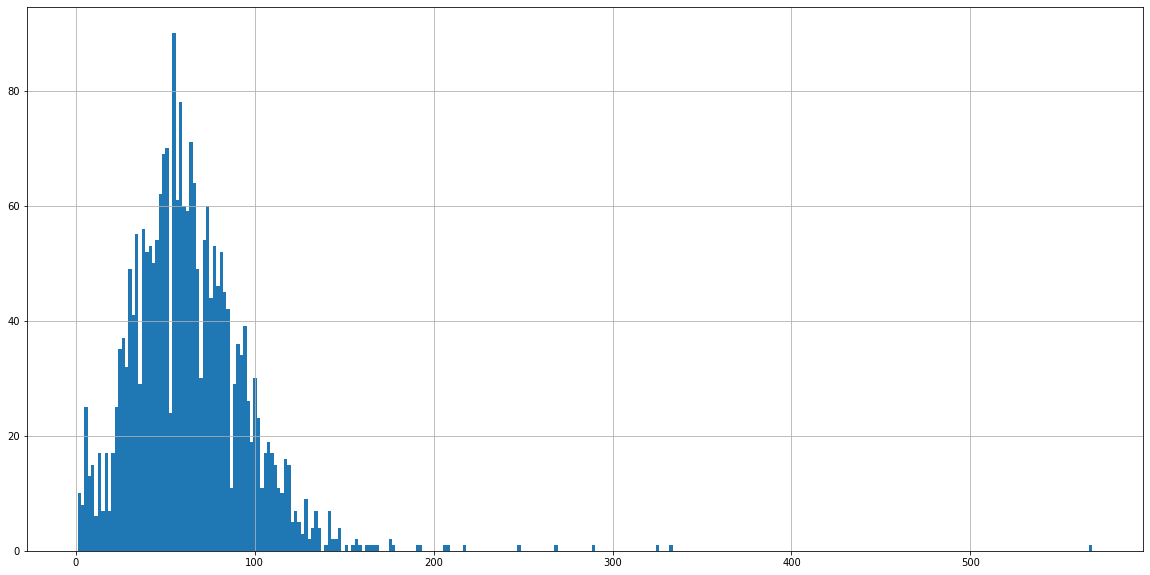

In [121]:
df["tokens_size"].hist(bins=300, figsize=(20,10))

WTF? Data in all_anam.pickle and all_anamnesis.pickle is quite different! Check graphics in the CheckAnamnesisData.ipynd

In [122]:
import regex

# Filter words with any non-сyrillic character
def filter_invalid_token(token_list):
    return [token for token in token_list if (not regex.search("\P{Cyrillic}", token)) & (not token.isupper())]

In [123]:
df["filtered_tokens"] = [filter_invalid_token(tokens) for tokens in df["tokens"]]

In [124]:
df["filtered_tokens"]

0       [Хронические, заболевания, в, анамнезе, стенок...
1       [Хронические, заболевания, в, анамнезе, стенок...
2       [Перенесенные, состояния, операции, отрицает, ...
3       [Хронические, заболевания, в, анамнезе, сахарн...
4       [Перенесенные, состояния, операции, по, поводу...
                              ...                        
2351    [Хронические, заболевания, в, анамнезе, стенок...
2352    [Хронические, заболевания, в, анамнезе, гастри...
2353    [Наследственность, заболевания, у, родственник...
2354    [Хронические, заболевания, в, анамнезе, стенок...
2355     [анамнезом, жизни, ознакомлена, дополнений, нет]
Name: filtered_tokens, Length: 2356, dtype: object

In [125]:
df["filtered_tokens_size"] = [len(tokens) for tokens in df["filtered_tokens"]]

<AxesSubplot:>

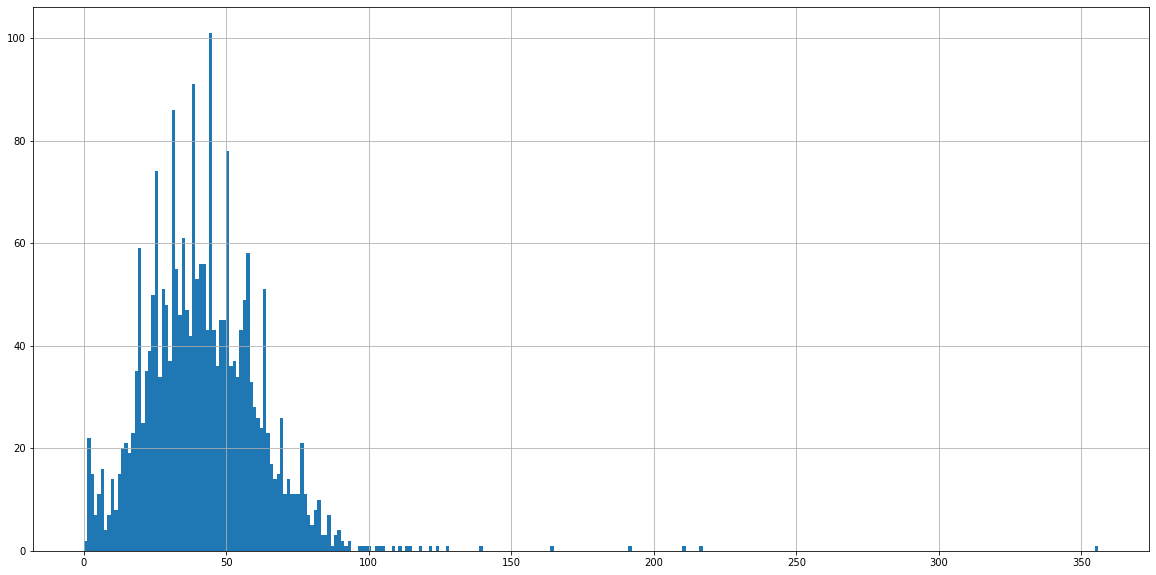

In [126]:
df["filtered_tokens_size"].hist(bins=300, figsize=(20,10))

In [127]:
quantile_levels = [.25,.5,.75,.9,.95,.99]
filtered_tokens_size_quantiles = df["filtered_tokens_size"].quantile(quantile_levels)
filtered_tokens_size_quantiles

0.25    28.00
0.50    41.00
0.75    54.00
0.90    66.00
0.95    75.00
0.99    91.45
Name: filtered_tokens_size, dtype: float64

In [128]:
df["filtered_tokens_size"].value_counts()

35     61
42     56
41     56
33     55
45     53
       ..
92      1
87      1
211     1
99      1
1       1
Name: filtered_tokens_size, Length: 114, dtype: int64

Check anamnesis with extremely low word counts

In [129]:
df[df["filtered_tokens_size"] <= 11]

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size
31,16037_С2014 16946_С2014.xml.txt,Аллергологический анамнез : без особенност...,"[Аллергологический, анамнез, :, без, особеннос...",9,"[Аллергологический, анамнез, без, особенностей...",7
32,6786_С2010.xml.txt,дополнений нет \n,"[дополнений, нет]",2,"[дополнений, нет]",2
45,1817_С2013.xml.txt,В диете исключены продукты с бифидо- и лакто-...,"[В, диете, исключены, продукты, с, бифидо-, и,...",10,"[диете, исключены, продукты, с, и, флорой]",6
50,10195_С2011.xml.txt,Аллергологический анамнез : без особенност...,"[Аллергологический, анамнез, :, без, особеннос...",9,"[Аллергологический, анамнез, без, особенностей...",7
62,18237_С2012.xml.txt,"В анамнезе: частые инфекции ВПД; в среднем, 3...","[В, анамнезе, :, частые, инфекции, ВПД, ;, в, ...",17,"[анамнезе, частые, инфекции, в, среднем, раза,...",10
...,...,...,...,...,...,...
2234,5507_С2014 6944_С2014.xml.txt,Дополнений нет. \n,"[Дополнений, нет, .]",3,"[Дополнений, нет]",2
2291,12674_С2015.xml.txt,Дополнений нет \n,"[Дополнений, нет]",2,"[Дополнений, нет]",2
2302,41_С2014.xml.txt,неизвестен \n,[неизвестен],1,[неизвестен],1
2307,7506_С2010.xml.txt,Дополнений нет. \n,"[Дополнений, нет, .]",3,"[Дополнений, нет]",2


In [130]:
df = df[df["filtered_tokens_size"] != 0]
df

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",35,"[Хронические, заболевания, в, анамнезе, стенок...",23
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",65,"[Хронические, заболевания, в, анамнезе, стенок...",40
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...,"[Перенесенные, состояния, :, операции, :, отри...",64,"[Перенесенные, состояния, операции, отрицает, ...",46
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",104,"[Хронические, заболевания, в, анамнезе, сахарн...",61
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...,"[Перенесенные, состояния, :, операции, :, по, ...",91,"[Перенесенные, состояния, операции, по, поводу...",65
...,...,...,...,...,...,...
2351,20306_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",33,"[Хронические, заболевания, в, анамнезе, стенок...",22
2352,10965_С2013 12400_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; г...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",54,"[Хронические, заболевания, в, анамнезе, гастри...",40
2353,1070_С2013 2248_С2013.xml.txt,Наследственность: заболевания у родственни...,"[Наследственность, :, заболевания, у, родствен...",43,"[Наследственность, заболевания, у, родственник...",35
2354,3890_С2011 4083_С2011.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",90,"[Хронические, заболевания, в, анамнезе, стенок...",50


Check anamnesis with many tokens

In [131]:
for tokens in df[df["filtered_tokens_size"] > 100]["filtered_tokens"]:
    print(tokens)

['Больной', 'лет', 'в', 'анамнезе', 'повторные', 'по', 'геморрагическому', 'типу', 'госпитализирован', 'в', 'экстренном', 'порядке', 'бригадой', 'в', 'с', 'диагнозом', 'трансмуральный', 'передней', 'стенки', 'от', 'выполнена', 'ангиопластика', 'со', 'стентированием', 'ответственной', 'рецидивирующая', 'фибрилляция', 'желудочков', 'проводилось', 'инфузия', 'кордароном', 'лидокаином', 'без', 'со', 'стентированием', 'в', 'без', 'признаков', 'ангиопластика', 'со', 'стентированием', 'значимого', 'стеноза', 'на', 'резко', 'возникло', 'нарушение', 'ритма', 'больного', 'перевели', 'на', 'была', 'выполнена', 'головного', 'картина', 'обширного', 'ишемического', 'инсульта', 'в', 'бас', 'в', 'выраженным', 'отеком', 'со', 'смещением', 'срединных', 'структур', 'дислокационный', 'синдром', 'мм', 'время', 'нахождения', 'в', 'проводилась', 'на', 'противоотечная', 'антигипоксантная', 'терапия', 'дезагрегантная', 'больного', 'осложнилось', 'развитием', 'гнойного', 'эндобронхита', 'к', 'терапии', 'добавле

It's ok

## Try to detect stopwords for anamnesis by tf-idf metric

Let's find stopwords by tf-idf to filter it out

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
tf_idf_vectorizer = TfidfVectorizer()

In [134]:
filtered_tokens_string = df["filtered_tokens"].apply(lambda x: " ".join(x))
filtered_tokens_string

0       Хронические заболевания в анамнезе стенокардия...
1       Хронические заболевания в анамнезе стенокардия...
2       Перенесенные состояния операции отрицает Респи...
3       Хронические заболевания в анамнезе сахарный ди...
4       Перенесенные состояния операции по поводу Са т...
                              ...                        
2351    Хронические заболевания в анамнезе стенокардия...
2352    Хронические заболевания в анамнезе гастрит хро...
2353    Наследственность заболевания у родственников м...
2354    Хронические заболевания в анамнезе стенокардия...
2355           анамнезом жизни ознакомлена дополнений нет
Name: filtered_tokens, Length: 2355, dtype: object

In [135]:
tf_idf_vectorizer = tf_idf_vectorizer.fit(filtered_tokens_string)

In [136]:
feature_names_string = " ".join(tf_idf_vectorizer.get_feature_names_out())
feature_names_string

'аалеригя аанмнез аб аборт аборта аборты абсолютно абсцесс абсцесса аварии аварийной авария августа авиакомпании авиации авиация автозаправочной автокрана автомеханик автомехаником автомобильная автомобиля автослесарем автослесарь аг агонисты адаптации адаптирован адвокат адвокатом адгезиолизис адельфана аденокарцинома аденома аденомой аденомы аденомэктомия аденоэктомии адентия аденэктомия административный администратором аднексэктомией аднексэктомия азербаджане азербайджане акад академии академик аккумуляторщиком аксиллярной активно активноесть активности активность активные активный актрапид актропид акустических акш алекс алергологический алкголем алкоглем алкогол алкоголей алкоголем алкоголизация алкоголизировался алкоголизм алкоголизма алкоголь алкогольная алкогольной алкогольнойгкмп алкогольные алкогольными алкогольных алкогольь алкоголя аллегологический аллегрия аллергены аллергии аллергические аллергический аллергических аллергию аллергия аллерглогический аллерго аллергоанамнез

In [137]:
tf_idf_matrix = tf_idf_vectorizer.transform([feature_names_string])
tf_idf_array = tf_idf_matrix.toarray().flatten()
tf_idf_array

array([0.0147919 , 0.0147919 , 0.0147919 , ..., 0.01404885, 0.0147919 ,
       0.0147919 ])

In [138]:
feature_names_with_tf_idf = np.array([tf_idf_vectorizer.get_feature_names_out(), tf_idf_array]).transpose()

In [139]:
tf_idf_df = pd.DataFrame(feature_names_with_tf_idf, columns=["word","tf-idf"])
tf_idf_df

,word,tf-idf
0,аалеригя,0.014792
1,аанмнез,0.014792
2,аб,0.014792
3,аборт,0.014792
4,аборта,0.014792
...,...,...
5114,январь,0.014049
5115,января,0.013522
5116,ярославской,0.014049
5117,ясна,0.014792


In [140]:
sorted_tf_idf_df = tf_idf_df.sort_values("tf-idf", ascending=True, ignore_index=True)
sorted_tf_idf_df

,word,tf-idf
0,анамнез,0.001937
1,аллергологический,0.002046
2,заболевания,0.002053
3,привычки,0.002149
4,вредные,0.002149
...,...,...
5114,месяцов,0.014792
5115,месяцы,0.014792
5116,металлоостеосинтезом,0.014792
5117,менингоэнцефалитом,0.014792


## Use stopwords from nltk

So it's too strange, and I mess to find any good threshold for define stop words list
Therefore we will use common stopwords from nltk lib.

In [141]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dmitrypogrebnoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

Let's use common nltk stopwords for russian and filter it out from anamnesis

In [143]:
df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))
df.head()

/tmp/ipykernel_49901/1978698187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords"] = df["filtered_tokens"].apply(lambda x: list(filter(lambda item: item not in stopwords.words('russian'), x)))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",35,"[Хронические, заболевания, в, анамнезе, стенок...",23,"[Хронические, заболевания, анамнезе, стенокард..."
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",65,"[Хронические, заболевания, в, анамнезе, стенок...",40,"[Хронические, заболевания, анамнезе, стенокард..."
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...,"[Перенесенные, состояния, :, операции, :, отри...",64,"[Перенесенные, состояния, операции, отрицает, ...",46,"[Перенесенные, состояния, операции, отрицает, ..."
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",104,"[Хронические, заболевания, в, анамнезе, сахарн...",61,"[Хронические, заболевания, анамнезе, сахарный,..."
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...,"[Перенесенные, состояния, :, операции, :, по, ...",91,"[Перенесенные, состояния, операции, по, поводу...",65,"[Перенесенные, состояния, операции, поводу, Са..."


In [144]:
df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))
df.head()

/tmp/ipykernel_49901/687987149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_size"] = df["filtered_tokens_without_nltk_stopwords"].apply(lambda x: len(x))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",35,"[Хронические, заболевания, в, анамнезе, стенок...",23,"[Хронические, заболевания, анамнезе, стенокард...",19
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",65,"[Хронические, заболевания, в, анамнезе, стенок...",40,"[Хронические, заболевания, анамнезе, стенокард...",32
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...,"[Перенесенные, состояния, :, операции, :, отри...",64,"[Перенесенные, состояния, операции, отрицает, ...",46,"[Перенесенные, состояния, операции, отрицает, ...",42
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",104,"[Хронические, заболевания, в, анамнезе, сахарн...",61,"[Хронические, заболевания, анамнезе, сахарный,...",53
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...,"[Перенесенные, состояния, :, операции, :, по, ...",91,"[Перенесенные, состояния, операции, по, поводу...",65,"[Перенесенные, состояния, операции, поводу, Са...",57


## Lemmatization

Also, we need to perform lemmatization for anamnesis words

In [145]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()

In [146]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \
    df["filtered_tokens_without_nltk_stopwords"].apply(lambda words: list(map(lambda word: lemmatizer.parse(word)[0].normal_form, words)))
df.head()

/tmp/ipykernel_49901/1733179443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization"] = \


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",35,"[Хронические, заболевания, в, анамнезе, стенок...",23,"[Хронические, заболевания, анамнезе, стенокард...",19,"[хронический, заболевание, анамнез, стенокарди..."
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",65,"[Хронические, заболевания, в, анамнезе, стенок...",40,"[Хронические, заболевания, анамнезе, стенокард...",32,"[хронический, заболевание, анамнез, стенокарди..."
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...,"[Перенесенные, состояния, :, операции, :, отри...",64,"[Перенесенные, состояния, операции, отрицает, ...",46,"[Перенесенные, состояния, операции, отрицает, ...",42,"[перенести, состояние, операция, отрицать, рес..."
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",104,"[Хронические, заболевания, в, анамнезе, сахарн...",61,"[Хронические, заболевания, анамнезе, сахарный,...",53,"[хронический, заболевание, анамнез, сахарный, ..."
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...,"[Перенесенные, состояния, :, операции, :, по, ...",91,"[Перенесенные, состояния, операции, по, поводу...",65,"[Перенесенные, состояния, операции, поводу, Са...",57,"[перенести, состояние, операция, повод, са, то..."


In [147]:
df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))
df

/tmp/ipykernel_49901/3727891929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"] = df["filtered_tokens_without_nltk_stopwords_with_lemmatization"].apply(lambda x: len(x))


,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size
0,11010_С2012.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",35,"[Хронические, заболевания, в, анамнезе, стенок...",23,"[Хронические, заболевания, анамнезе, стенокард...",19,"[хронический, заболевание, анамнез, стенокарди...",19
1,9431_С2010 9979_С2010.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",65,"[Хронические, заболевания, в, анамнезе, стенок...",40,"[Хронические, заболевания, анамнезе, стенокард...",32,"[хронический, заболевание, анамнез, стенокарди...",32
2,8760_С2011.xml.txt,Перенесенные состояния: операции: отрицает ...,"[Перенесенные, состояния, :, операции, :, отри...",64,"[Перенесенные, состояния, операции, отрицает, ...",46,"[Перенесенные, состояния, операции, отрицает, ...",42,"[перенести, состояние, операция, отрицать, рес...",42
3,25623_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",104,"[Хронические, заболевания, в, анамнезе, сахарн...",61,"[Хронические, заболевания, анамнезе, сахарный,...",53,"[хронический, заболевание, анамнез, сахарный, ...",53
4,5722_С2014.xml.txt,Перенесенные состояния: операции: по поводу...,"[Перенесенные, состояния, :, операции, :, по, ...",91,"[Перенесенные, состояния, операции, по, поводу...",65,"[Перенесенные, состояния, операции, поводу, Са...",57,"[перенести, состояние, операция, повод, са, то...",57
...,...,...,...,...,...,...,...,...,...,...
2351,20306_С2015.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",33,"[Хронические, заболевания, в, анамнезе, стенок...",22,"[Хронические, заболевания, анамнезе, стенокард...",19,"[хронический, заболевание, анамнез, стенокарди...",19
2352,10965_С2013 12400_С2013.xml.txt,Хронические заболевания в анамнезе : ГБ; г...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",54,"[Хронические, заболевания, в, анамнезе, гастри...",40,"[Хронические, заболевания, анамнезе, гастрит, ...",34,"[хронический, заболевание, анамнез, гастрит, х...",34
2353,1070_С2013 2248_С2013.xml.txt,Наследственность: заболевания у родственни...,"[Наследственность, :, заболевания, у, родствен...",43,"[Наследственность, заболевания, у, родственник...",35,"[Наследственность, заболевания, родственников,...",30,"[наследственность, заболевание, родственник, м...",30
2354,3890_С2011 4083_С2011.xml.txt,Хронические заболевания в анамнезе : ГБ; И...,"[Хронические, заболевания, в, анамнезе, :, ГБ,...",90,"[Хронические, заболевания, в, анамнезе, стенок...",50,"[Хронические, заболевания, анамнезе, стенокард...",45,"[хронический, заболевание, анамнез, стенокарди...",45


Check that the lemmatization doesn't drop any words from anamnesis texts

In [148]:
df[df["filtered_tokens_without_nltk_stopwords_size"] != df["filtered_tokens_without_nltk_stopwords_with_lemmatization_size"]]

,filename,text,tokens,tokens_size,filtered_tokens,filtered_tokens_size,filtered_tokens_without_nltk_stopwords,filtered_tokens_without_nltk_stopwords_size,filtered_tokens_without_nltk_stopwords_with_lemmatization,filtered_tokens_without_nltk_stopwords_with_lemmatization_size


There are many records start with "Хронический заболевание анамнез" and other common starts, let's remove them. It seems it is common titles for the docs.

In [149]:
df.filtered_tokens_without_nltk_stopwords_with_lemmatization.apply(lambda x: " ".join(x[:3])).value_counts()

хронический заболевание анамнез    1143
перенести состояние операция        245
расти развиваться детство           125
перенести состояние травма           79
страховой анамнез работать           38
                                   ... 
ронический заболевание анамнез        1
родиться г витебск                    1
образование высокий полковник         1
ожирение ст нарушение                 1
родиться г гатчина                    1
Name: filtered_tokens_without_nltk_stopwords_with_lemmatization, Length: 493, dtype: int64

In [150]:
COMMON_START_TOKEN_COUNT = 3

def filter_common_starts(token_list):
    record_start_tokens = token_list[:COMMON_START_TOKEN_COUNT]
    if record_start_tokens == ["хронический", "заболевание", "анамнез"] or \
            record_start_tokens == ["перенести", "состояние", "операция"]:
        return token_list[3:]
    else:
        return token_list

In [151]:
df.filtered_tokens_without_nltk_stopwords_with_lemmatization = df.filtered_tokens_without_nltk_stopwords_with_lemmatization.apply(lambda x: filter_common_starts(x))

/home/dmitrypogrebnoy/Desktop/MedSpellChecker/venv/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [152]:
df.filtered_tokens_without_nltk_stopwords_with_lemmatization

0       [стенокардия, напряжение, хронический, гастрод...
1       [стенокардия, аппендэктомия, летний, возраст, ...
2       [отрицать, респираторный, заболевание, хрониче...
3       [сахарный, диабет, тип, язвенный, болезнь, две...
4       [повод, са, толстой, кишка, выведение, калосто...
                              ...                        
2351    [стенокардия, сахарный, диабет, тип, диабетиче...
2352    [гастрит, хронический, наследственность, забол...
2353    [наследственность, заболевание, родственник, м...
2354    [стенокардия, напряжение, гастрит, хронический...
2355             [анамнез, жизнь, ознакомить, дополнение]
Name: filtered_tokens_without_nltk_stopwords_with_lemmatization, Length: 2355, dtype: object

## Save result dataframe to file

In [153]:
df.to_csv("../../data/anamnesis/processed/almazov_anamnesis_dataframe.csv")